In [2]:
# importing important libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score



In [3]:
# Reading the Dataset
df=pd.read_csv('/content/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Exploratory Data Analysis
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
# Feature Selection
new_data=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
new_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [6]:
# check null values
new_data.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

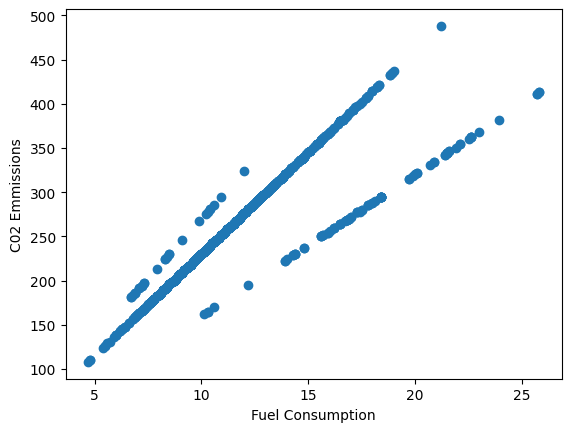

In [7]:
# Plotting a scatter plot to see the distribution of data points
plt.scatter(df.FUELCONSUMPTION_COMB,df.CO2EMISSIONS)
plt.xlabel('Fuel Consumption')
plt.ylabel('C02 Emmissions')
plt.show()


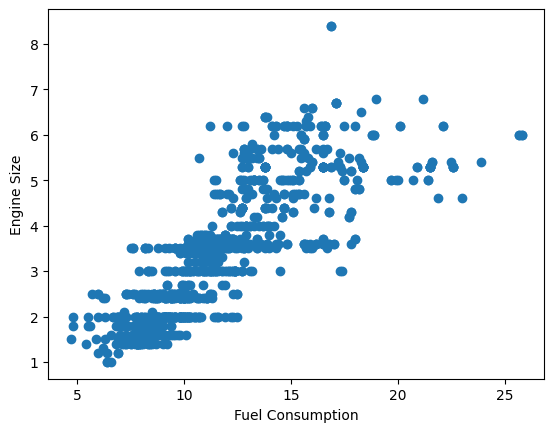

In [9]:
# Plot to see the Distribution of Engine Size vs Fuel Consumption
plt.scatter(df.FUELCONSUMPTION_COMB,df.ENGINESIZE)
plt.xlabel('Fuel Consumption')
plt.ylabel('Engine Size')
plt.show()

In [23]:
# Creating a training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_data.FUELCONSUMPTION_COMB,new_data.CO2EMISSIONS,test_size=8,random_state=0)


In [24]:
# Reshaping the traing set
x_test=x_test.reshape(-1,1)
x_train=x_train.reshape(-1,1)

y_test=y_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)




AttributeError: 'Series' object has no attribute 'reshape'

In [21]:
# Modelling
print('\nModelling using FUELCONSUMPTION_COMB :')
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

print('Coefficient : ', reg.coef_[0][0])
print('Intercept : ', reg.intercept_[0])

#Output Plotting
plt.scatter(x_train, y_train)
plt.plotx(x_train, reg.coef_[0][0]*x_train + reg.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

predictions = reg.predict(x_test)

print('\nModel Evaluation :')
print('R2-Score : ', r2_score(y_test, predictions))




Modelling using FUELCONSUMPTION_COMB :


ValueError: Expected 2D array, got 1D array instead:
array=[15.5  9.1 10.   9.2  7.3 12.7  9.2 12. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:





#Modelling

print('\nModelling using FUELCONSUMPTION_COMB :')
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

print('Coefficient : ', reg.coef_[0][0])
print('Intercept : ', reg.intercept_[0])

#Output Plotting
plt.scatter(train_x, train_y)
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

predictions = reg.predict(test_x)

print('\nModel Evaluation :')
print('R2-Score : ', r2_score(test_y, predictions))
